In [27]:
import pandas as pd

# Use the correct path and file name
filepath=(r"C:\Users\USER\Downloads\healthcare_staff_by_state.csv")
df = pd.read_csv(filepath)

# Quick preview
print(df.shape)         # Check number of rows and columns
print(df.columns)       # List all column names
print(df.dtypes)        # Data types of each column
df.head()               # Show first few rows

# Clean column names
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Convert date to year
df['year'] = pd.to_datetime(df['date']).dt.year
df.drop(columns=['date'], inplace=True)

df['state'] = df['state'].str.strip().str.title()
df['type'] = df['type'].str.strip().str.lower()

#remove duplicate 
df = df.drop_duplicates()

#check missing value
df.isnull().sum()

#rename columns
df.rename(columns={'type': 'staff_type', 'staff': 'staff_count'}, inplace=True)

#illogical value
df[df['staff_count'] < 0]

df.to_csv('preprocessed_healthcare_staff_by_state.csv', index=False)

(765, 4)
Index(['state', 'type', 'date', 'staff'], dtype='object')
state    object
type     object
date     object
staff     int64
dtype: object


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct path and file name
filepath=(r"C:\Users\USER\Downloads\AgeWise\Dataset\final_datausage_cleaned.csv")
df = pd.read_csv(filepath)


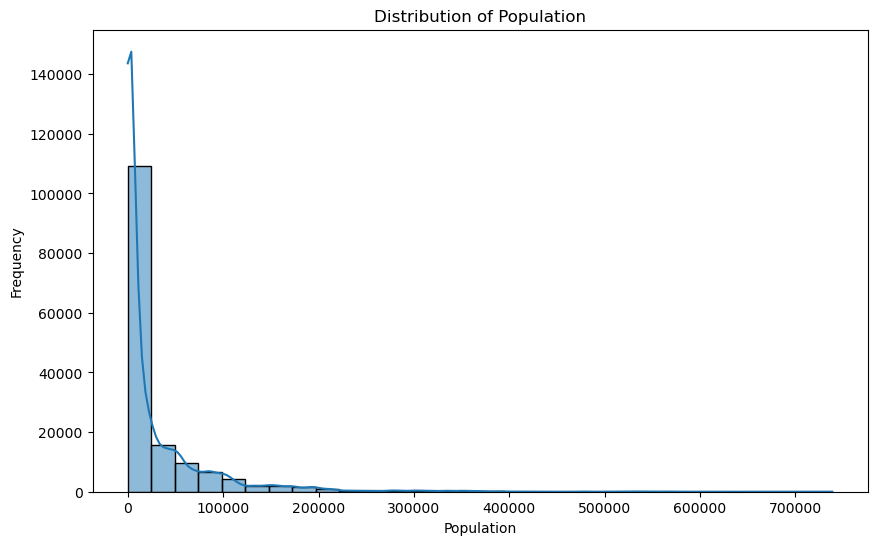

In [2]:
# --------------------------
# 3. Univariate Analysis
# --------------------------

# Distribution of total population
plt.figure(figsize=(10, 6))
sns.histplot(df['population'], bins=30, kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

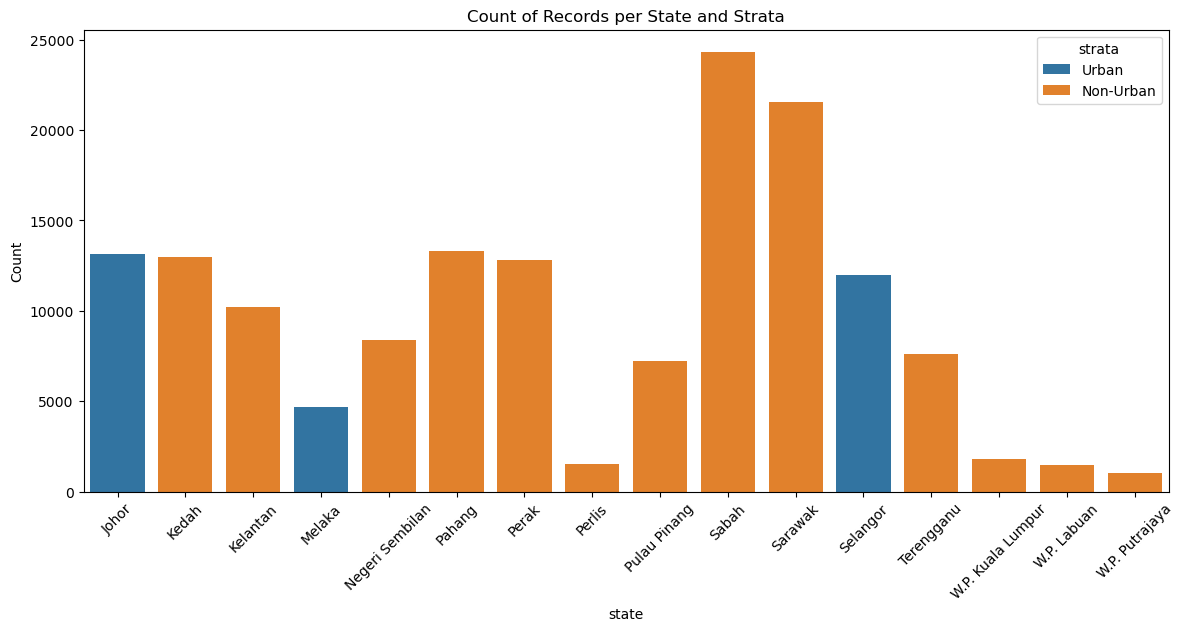

In [3]:
# Count of records per state and strata
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='state', hue='strata')
plt.title('Count of Records per State and Strata')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

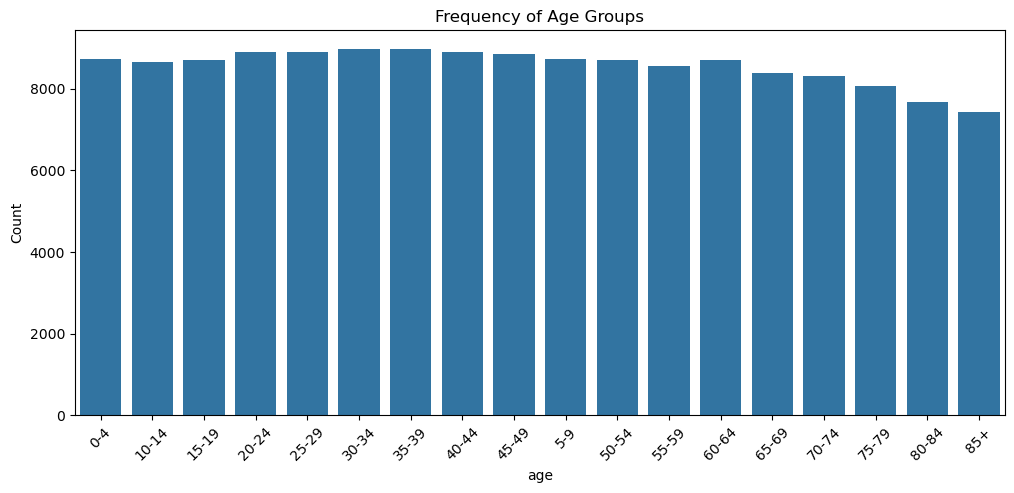

In [4]:
# Frequency of age groups
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='age', order=sorted(df['age'].unique()))
plt.title('Frequency of Age Groups')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

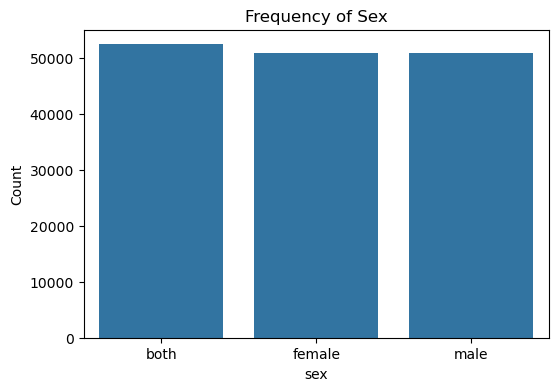

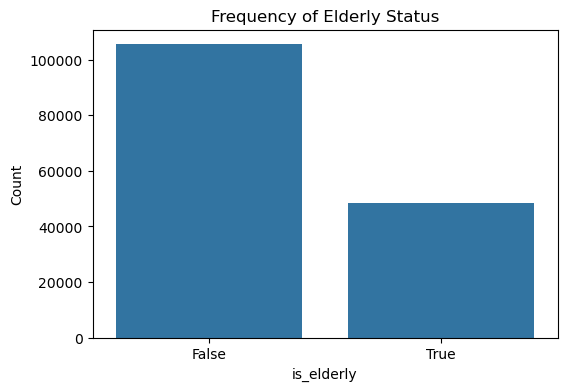

In [5]:
# Frequency of sex
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex')
plt.title('Frequency of Sex')
plt.ylabel('Count')
plt.show()

# Frequency of elderly status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_elderly')
plt.title('Frequency of Elderly Status')
plt.ylabel('Count')
plt.show()

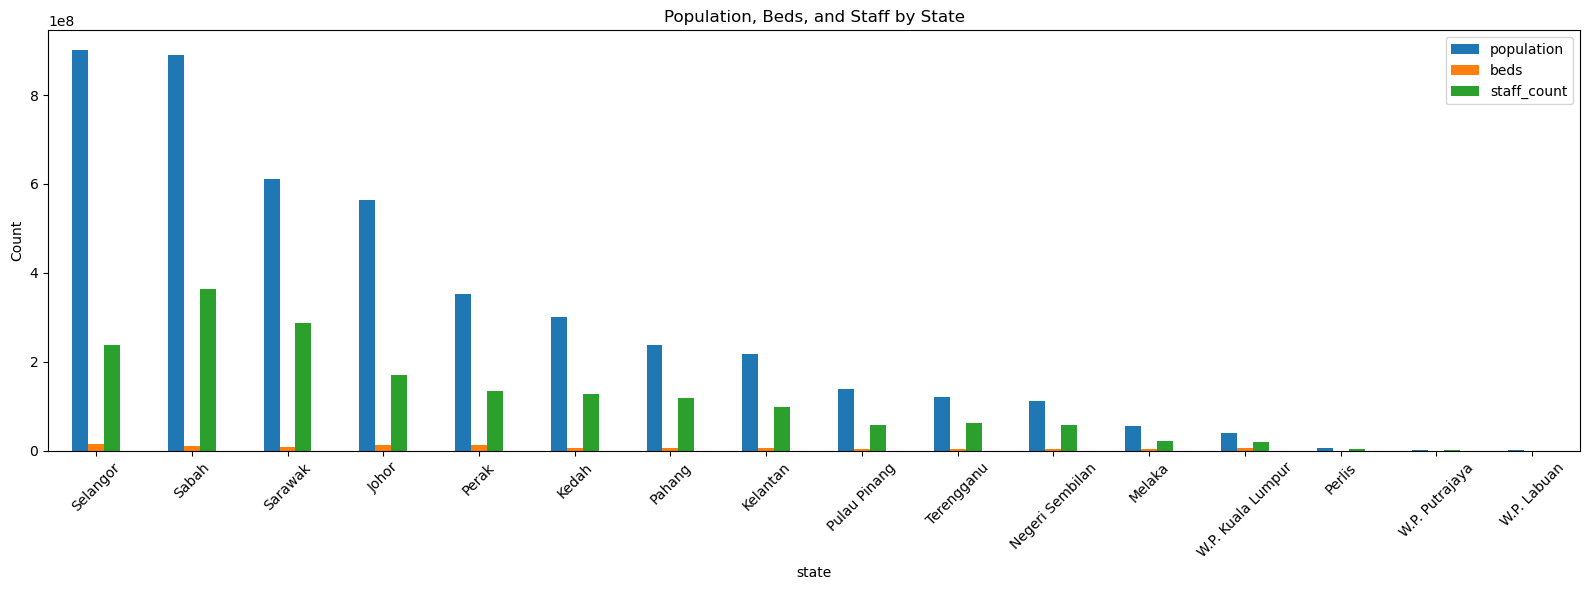

In [6]:
# --------------------------
# 4. Bivariate/Multivariate Analysis
# --------------------------

# Population, beds, and staff by state
grouped_state = df.groupby('state')[['population', 'beds', 'staff_count']].sum().sort_values('population', ascending=False)
grouped_state.plot(kind='bar', figsize=(16, 6))
plt.title('Population, Beds, and Staff by State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


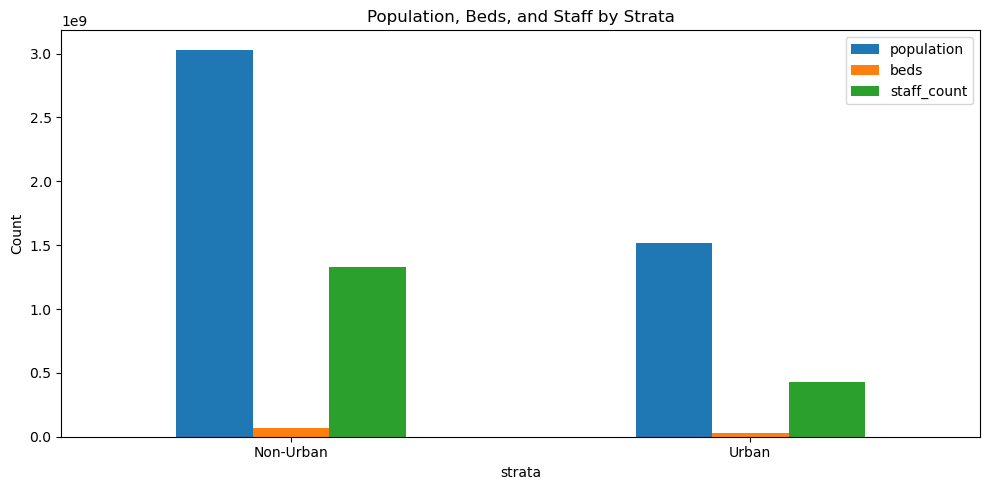

In [7]:
# Population, beds, and staff by strata
grouped_strata = df.groupby('strata')[['population', 'beds', 'staff_count']].sum()
grouped_strata.plot(kind='bar', figsize=(10, 5))
plt.title('Population, Beds, and Staff by Strata')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


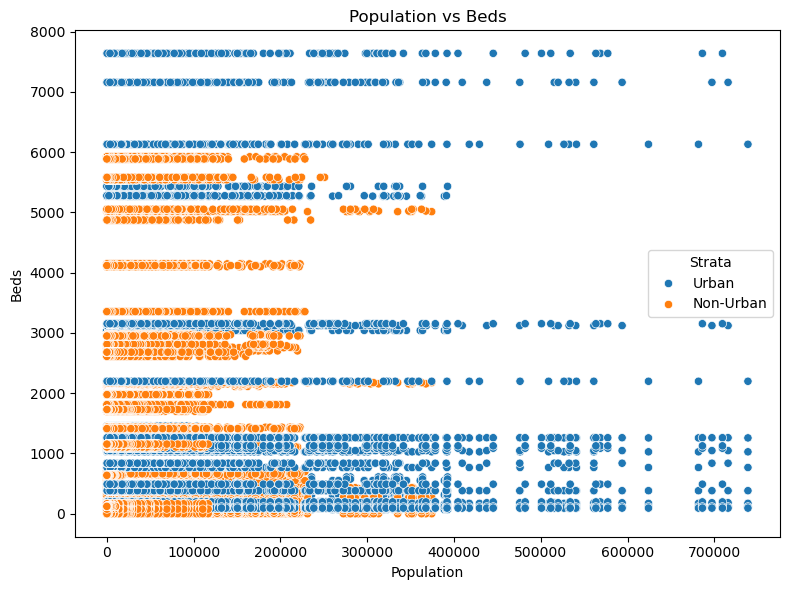

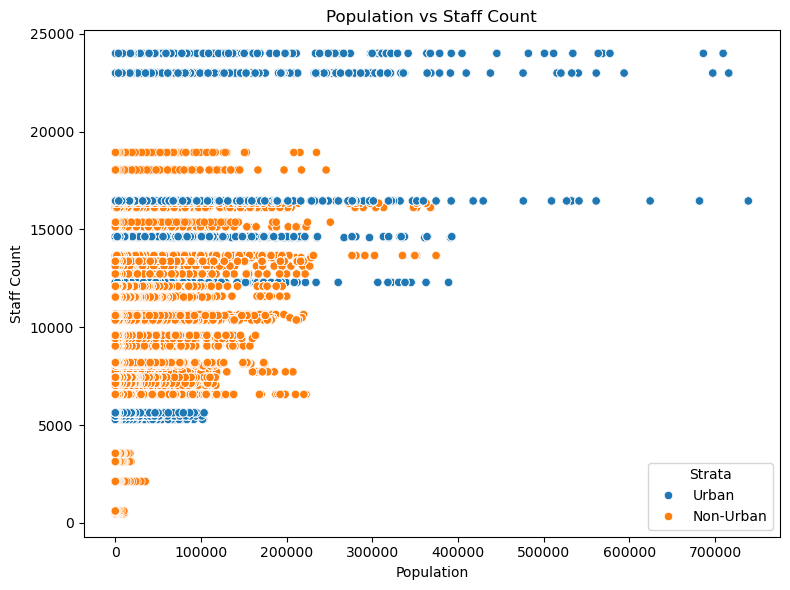

In [8]:
# Relationship: Population vs Beds
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='population', y='beds', hue='strata')
plt.title('Population vs Beds')
plt.xlabel('Population')
plt.ylabel('Beds')
plt.legend(title='Strata')
plt.tight_layout()
plt.show()

# Relationship: Population vs Staff
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='population', y='staff_count', hue='strata')
plt.title('Population vs Staff Count')
plt.xlabel('Population')
plt.ylabel('Staff Count')
plt.legend(title='Strata')
plt.tight_layout()
plt.show()